# \_\_call\_\_() magic method
- 객체를 함수처럼 호출 할 수 있도록 한다.
- `객체()` 로 호출 할 때 __call__ 메소드가 호출되어 실행된다.

In [7]:
class Person:
    def __init__(self, name):
        self.name = name
        
    def __call__(self, age):
        print(f'이름: {self.name}, 나이: {age}')  # age: 매개변수로 받은값. name: 객체의 attribute
        return f'이름: {self.name}, 나이: {age} - 문자열'  #return value

In [8]:
p = Person("홍길동")
r = p(20)

이름: 홍길동, 나이: 20


In [9]:
print(r)

이름: 홍길동, 나이: 20 - 문자열


In [10]:
r = Person("길동")(25)  # 객체 생성하면서 __call__() 바로 호출
print(r)

이름: 길동, 나이: 25
이름: 길동, 나이: 25 - 문자열


# Functional API
- Sequential 모델은 각 Layer들의 입력과 출력이 하나라고 가정한다. 그리고 각각의 Layer(입력층, 은닉층, 출력층)들을 차례대로 쌓아 구성한다. 그래서 다양한 구조의 네트워크를 만드는데 한계가 있다.
- 함수형 API를 사용하면 **다중입력, 다중출력, 그래프 형태**의 다양한 형태의 레이어들을 유연하게 구성할 수 있다.

- Functional API는 직접 텐서들의 입출력을 다룬다. 
- 함수호출 처럼 Layer를 이용하여 입력 텐서(Input Tensor)를 입력 받고 그 결과를 출력 텐서(Output Tensor)로 반환하는 형식으로 모델을 구현한다.

```python
input_tensor = Input(shape=(16,))
dense = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(32, activation='sigmoid')(dense)

model = models.Model(input_tensor, output_tensor)
```

## Sequential, Functional API 

### Sequential

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import layers, models

In [12]:
seq_model = keras.Sequential()
seq_model.add(layers.Input(shape=(32,32,3)))

seq_model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
seq_model.add(layers.MaxPooling2D(padding="same"))
seq_model.add(layers.Flatten())

seq_model.add(layers.Dense(units=256, activation='relu'))
seq_model.add(layers.Dense(units=10, activation='softmax', name='output_layer'))
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 256)               4194560   
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 4,198,922
Trainable params: 4,198,922
Non-trainable params: 0
______________________________________________

### Functional API

In [15]:
# 레이어의 흐름 구조를 구현
input_tensor = layers.Input(shape=(32, 32, 3))   # 입력 값을 생성(레이어가 아님.)

# y = f(input_tensor) # unit/layer/model 모두 함수.
conv_tensor = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input_tensor)
# conv_tensor2 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input_tensor)
pool_tensor = layers.MaxPooling2D(padding='same')(conv_tensor)
flatten_tensor = layers.Flatten()(pool_tensor)
dense_tensor = layers.Dense(256, activation='relu')(flatten_tensor)
output_tensor = layers.Dense(10, activation='softmax')(dense_tensor)

# 모델 생성-> input들과 output들을 넣어서 생성. => 
#     input들/output들 : 학습/추론할때 실제 생성될 입력값, 출력값을 표현하는 tensor 객체. 여러개일 경우 리스트로 묶어서 전달.
fn_model = models.Model(input_tensor, output_tensor)

In [14]:
fn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_1 (Dense)             (None, 256)               4194560   
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                             

##### 각 Layer의 출력 변수들 통일. 
- 일반적으로 block 단위로 동일한 변수명을 사용.
- hidden layer들의 출력결과는 모두 동일한 변수명을 사용

In [ ]:
x = 10
r = f1(x)
r = f2(r)
r = f3(r)
o = f4(r)

In [17]:
input_tensor = layers.Input(shape=(32,32,3))

x1 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(input_tensor)
x1 = layers.MaxPooling2D(padding='same')(x1)

x2 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x1)
x2 = layers.MaxPooling2D(padding='same')(x2)

x3 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x2)
x3 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x3)
x3 = layers.MaxPooling2D(padding='same')(x3)

x4 = layers.Flatten()(x3)
output_tensor = layers.Dense(10, activation='softmax')(x4)

model3 = models.Model(input_tensor, output_tensor)

model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 16)          2320

##### trainable 설정

In [ ]:
Person("홍길동")(30)

p = Person('이순신')
p.name = '이순신2'
p(30)

In [ ]:
c1 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')
c1.trainable=False
c2 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')
c3 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')

input_tensor = layers.Input(shape=(32,32,3))
x = c1(input_tensor)
x = c2(x)
x = c3(x)


In [18]:
input_tensor = layers.Input(shape=(32,32,3))

c1 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')
c1.trainable = False
x1 = c1(input_tensor)

x1 = layers.MaxPooling2D(padding='same')(x1)

x2 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x1)
x2 = layers.MaxPooling2D(padding='same')(x2)

x3 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x2)
x3 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x3)
x3 = layers.MaxPooling2D(padding='same')(x3)

x4 = layers.Flatten()(x3)
output_tensor = layers.Dense(10, activation='softmax')(x4)

model3 = models.Model(input_tensor, output_tensor)

model3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 16)          2320

##### Transfer learning

In [23]:
backbone = applications.VGG16(include_top=False)
backbone.trainable = False

input_tensor = layers.Input(shape=(224,224,3))
x = backbone(input_tensor)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(512, activation='relu')(x)
output_tensor = layers.Dense(1, activation='sigmoid')(x)
output_tensor2 = layers.Dense(10, activation='softmax')(x)

model4 = models.Model(input_tensor, [output_tensor, output_tensor2])
model4.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_12[0][0]']               
                                512)                                                              
                                                                                                  
 global_average_pooling2d_2 (Gl  (None, 512)         0           ['vgg16[0][0]']                  
 obalAveragePooling2D)                                                                      

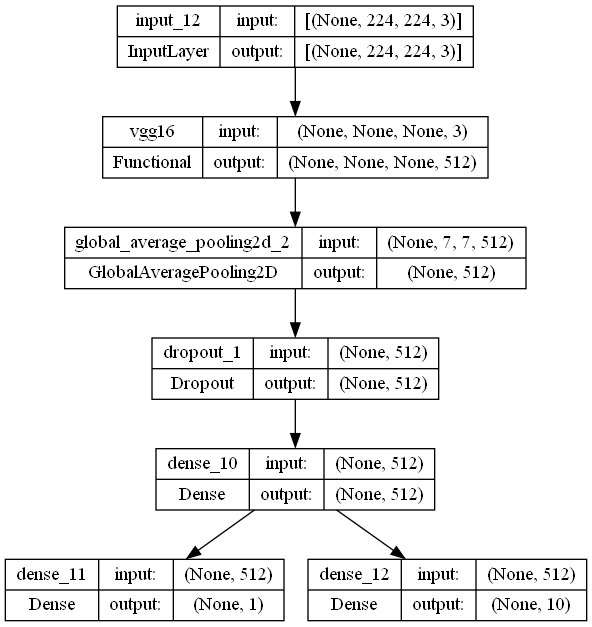

In [24]:
keras.utils.plot_model(model4, show_shapes=True)

## 여러개의 출력결과를  합치는 Layer

- 앞 레이어들에서 출력된 값이 여러개이고 이것을 하나의 Layer의 입력으로 넣어 줄 경우 **여러개의 출력값을 합쳐 줘야 한다.** 이때 단순이 합치거나 element wise 연산을 통해 합칠 수 있다. 
- 함수와 Layer class 두가지 방식을 제공한다.
    - tensorflow.keras.layers 모듈로 제공
- **concatenate(list, axis=-1)/Concatenate(axis=-1)([list])**
    - 레이어들을 단순히 합친다. (붙이는 처리)
    - list: 합칠 레이어들을 리스트에 묶어 전달
    - axis: 합칠 기준축. (기본값: -1 : 마지막 축기준)
- **add(list)/Add()(list), substract(list)/Subtract()(list), multiply(list)/Multiply()(list)**
    - 같은 index의 값들을 계산해서(더하기, 빼기, 곱하기) 하나의 레이어로 만든다.
    - list: 합칠 레이어들을 리스트에 묶어 전달

In [6]:
#ResNet의 Residual Block을 구현.
input_tensor = layers.Input(shape=(32,32,3))
x = layers.Conv2D(filters=64, kernel_size=7, padding='same', activation='relu')(input_tensor)
x = layers.MaxPooling2D(padding='same')(x)

# residual block : x-input
x1 = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x)
x1 = layers.BatchNormalization()(x1)
x1 = layers.ReLU()(x1)
x1 = layers.Conv2D(filters=128, kernel_size=3, padding='same')(x1)
x1 = layers.BatchNormalization()(x1)
# point wise conv을 이용해 channel size 조정.
x1 = layers.Conv2D(filters=64, kernel_size=1, padding='same')(x1)  
#x와 x1을 더하기
x1 = layers.Add()([x, x1])   # x1 = layers.add([x, x1])

output_tensor = layers.ReLU()(x1)

rb_model = models.Model(input_tensor, output_tensor)

In [7]:
rb_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 32, 32, 64)   9472        ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 16, 16, 64)  0           ['conv2d_6[0][0]']               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 16, 16, 64)   36928       ['max_pooling2d_2[0][0]']        
                                                                                            

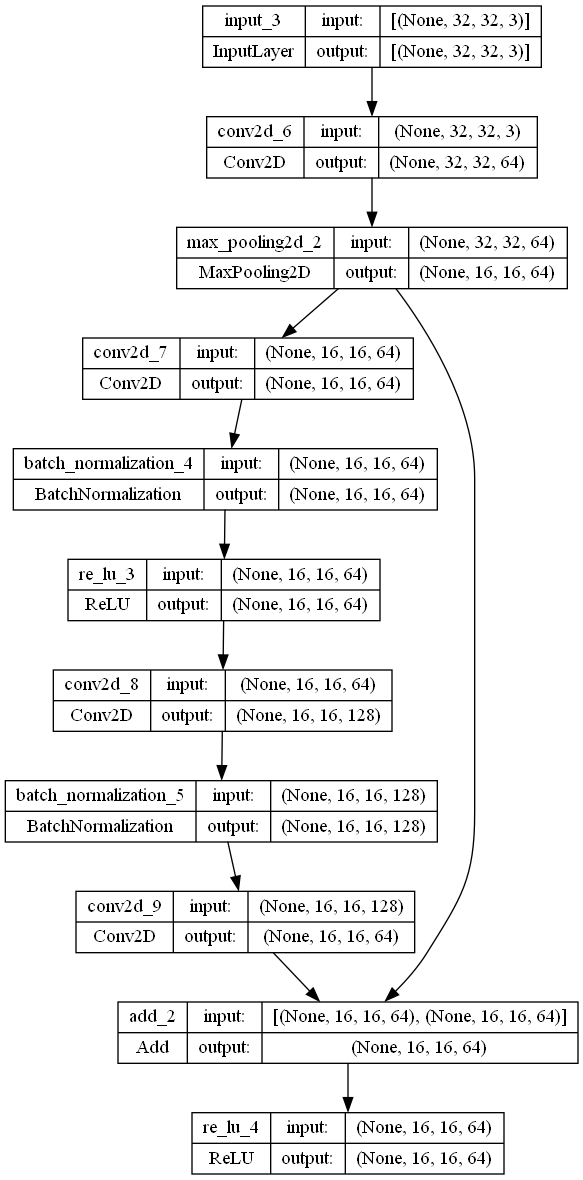

In [8]:
keras.utils.plot_model(rb_model, show_shapes=True)

### 다중 출력 모델
- 가정
    - iris 데이터셋에서 꽃받침의 너비와 높이로 꽃잎의 너비, 높이, 꽃 종류를 예측하는 모델
    - 출력결과가 3개가 나와야 한다.
- X: 꽃받침 너비, 높이
- y: 꽃잎 너비, 높이, 꽃 종류

In [10]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [11]:
# X, y의 형태를 변환 
# y1: petal length, y2: petal width, y3: target
y1 = X[:, 2]
y2 = X[:, 3]
y3 = y

# X: sepal length, width
X = X[:, [0, 1]]
X.shape, y1.shape, y2.shape, y3.shape

((150, 2), (150,), (150,), (150,))

##### 모델 정의 및 컴파일

In [12]:
# 모델정의 - 입력: X, 출력: y1, y2, y3 (다중출력)
input_tensor = layers.Input(shape=(2, ))
# hidden layer
x = layers.Dense(units=16, activation='relu')(input_tensor)
x = layers.Dense(units=8, activation='relu')(x)

# output layer
output_tensor1 = layers.Dense(1, name='petal_length_output')(x)
output_tensor2 = layers.Dense(1, name='petal_width_output')(x)
output_tensor3 = layers.Dense(3, activation='softmax', name='species_output')(x)

model = models.Model(input_tensor, [output_tensor1, output_tensor2, output_tensor3])
# input이나 output이 여러개일 경우 List로 묶어서 전달.

In [13]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           48          ['input_4[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 8)            136         ['dense[0][0]']                  
                                                                                                  
 petal_length_output (Dense)    (None, 1)            9           ['dense_1[0][0]']                
                                                                                            

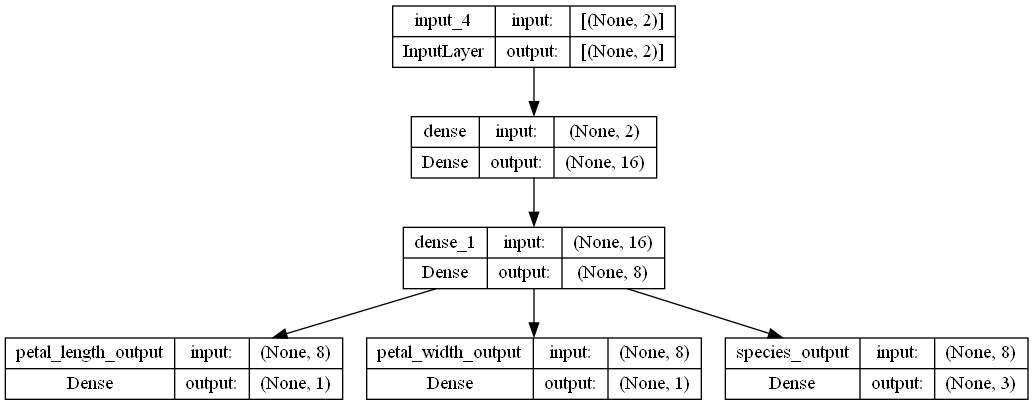

In [14]:
keras.utils.plot_model(model, show_shapes=True)

In [17]:
# compile
model.compile(optimizer='adam', 
              loss=["mse", "mse", "sparse_categorical_crossentropy"])
             # 출력결과순서별로 loss를 구해서 모두 더한 Total Loss 를 이용해 최적화작업을 수행한다.

In [30]:
tf.data.Dataset.from_tensor_slices((X, (y1, y2, y3)))

<TensorSliceDataset element_spec=(TensorSpec(shape=(2,), dtype=tf.float64, name=None), (TensorSpec(shape=(), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None)))>

In [18]:
hist = model.fit(X, 
                [y1, y2, y3],  # y가 여러개이면 리스트로 묶어준다.
                epochs=100,
                validation_split=0.2 
                )

Epoch 1/100
4/4 [==============================] - 2s 102ms/step - loss: 35.6906 - petal_length_output_loss: 31.9710 - petal_width_output_loss: 2.5700 - species_output_loss: 1.1496 - val_loss: 67.1428 - val_petal_length_output_loss: 59.6820 - val_petal_width_output_loss: 6.0121 - val_species_output_loss: 1.4487
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 33.3979 - petal_length_output_loss: 30.0253 - petal_width_output_loss: 2.2214 - species_output_loss: 1.1512 - val_loss: 63.3683 - val_petal_length_output_loss: 56.5781 - val_petal_width_output_loss: 5.3438 - val_species_output_loss: 1.4464
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 31.2364 - petal_length_output_loss: 28.1720 - petal_width_output_loss: 1.9084 - species_output_loss: 1.1560 - val_loss: 59.7838 - val_petal_length_output_loss: 53.6140 - val_petal_width_output_loss: 4.7286 - val_species_output_loss: 1.4413
Epoch 4/100
4/4 [==============================] - 0s 21ms/step

4/4 [==============================] - 0s 24ms/step - loss: 9.5923 - petal_length_output_loss: 7.9091 - petal_width_output_loss: 0.5553 - species_output_loss: 1.1279 - val_loss: 20.5649 - val_petal_length_output_loss: 18.6919 - val_petal_width_output_loss: 0.3500 - val_species_output_loss: 1.5229
Epoch 28/100
4/4 [==============================] - 0s 19ms/step - loss: 9.2878 - petal_length_output_loss: 7.6056 - petal_width_output_loss: 0.5607 - species_output_loss: 1.1215 - val_loss: 19.9690 - val_petal_length_output_loss: 18.0871 - val_petal_width_output_loss: 0.3410 - val_species_output_loss: 1.5409
Epoch 29/100
4/4 [==============================] - 0s 17ms/step - loss: 9.0066 - petal_length_output_loss: 7.3241 - petal_width_output_loss: 0.5664 - species_output_loss: 1.1160 - val_loss: 19.3742 - val_petal_length_output_loss: 17.4842 - val_petal_width_output_loss: 0.3321 - val_species_output_loss: 1.5580
Epoch 30/100
4/4 [==============================] - 0s 23ms/step - loss: 8.7232 

4/4 [==============================] - 0s 22ms/step - loss: 4.6781 - petal_length_output_loss: 3.2040 - petal_width_output_loss: 0.4605 - species_output_loss: 1.0135 - val_loss: 9.3274 - val_petal_length_output_loss: 7.1021 - val_petal_width_output_loss: 0.3960 - val_species_output_loss: 1.8293
Epoch 54/100
4/4 [==============================] - 0s 16ms/step - loss: 4.5936 - petal_length_output_loss: 3.1271 - petal_width_output_loss: 0.4554 - species_output_loss: 1.0111 - val_loss: 9.1067 - val_petal_length_output_loss: 6.8618 - val_petal_width_output_loss: 0.4088 - val_species_output_loss: 1.8361
Epoch 55/100
4/4 [==============================] - 0s 22ms/step - loss: 4.5249 - petal_length_output_loss: 3.0683 - petal_width_output_loss: 0.4474 - species_output_loss: 1.0092 - val_loss: 8.9001 - val_petal_length_output_loss: 6.6367 - val_petal_width_output_loss: 0.4242 - val_species_output_loss: 1.8392
Epoch 56/100
4/4 [==============================] - 0s 21ms/step - loss: 4.4642 - peta

4/4 [==============================] - 0s 19ms/step - loss: 3.8299 - petal_length_output_loss: 2.5199 - petal_width_output_loss: 0.3440 - species_output_loss: 0.9659 - val_loss: 6.3507 - val_petal_length_output_loss: 3.8809 - val_petal_width_output_loss: 0.6509 - val_species_output_loss: 1.8189
Epoch 80/100
4/4 [==============================] - 0s 18ms/step - loss: 3.8155 - petal_length_output_loss: 2.5098 - petal_width_output_loss: 0.3416 - species_output_loss: 0.9642 - val_loss: 6.3218 - val_petal_length_output_loss: 3.8459 - val_petal_width_output_loss: 0.6584 - val_species_output_loss: 1.8174
Epoch 81/100
4/4 [==============================] - 0s 17ms/step - loss: 3.8023 - petal_length_output_loss: 2.5009 - petal_width_output_loss: 0.3391 - species_output_loss: 0.9624 - val_loss: 6.2915 - val_petal_length_output_loss: 3.8100 - val_petal_width_output_loss: 0.6638 - val_species_output_loss: 1.8177
Epoch 82/100
4/4 [==============================] - 0s 19ms/step - loss: 3.7912 - peta

In [ ]:
loss: 35.6906 - 
    petal_length_output_loss: 31.9710 - petal_width_output_loss: 2.5700 - species_output_loss: 1.1496 
                
- val_loss: 67.1428 - val_petal_length_output_loss: 59.6820 - val_petal_width_output_loss: 6.0121 - val_species_output_loss: 1.4487

In [19]:
loss: 3.5857 - petal_length_output_loss: 2.3520 - petal_width_output_loss: 0.3025 - species_output_loss: 0.9312 

- val_loss: 5.9203 - val_petal_length_output_loss: 3.4391 - val_petal_width_output_loss: 0.6980 - val_species_output_loss: 1.7831

35.690599999999996

##### 결과 시각화

In [20]:
hist.history.keys()

dict_keys(['loss', 'petal_length_output_loss', 'petal_width_output_loss', 'species_output_loss', 'val_loss', 'val_petal_length_output_loss', 'val_petal_width_output_loss', 'val_species_output_loss'])

##### 새로운 데이터 추론

In [22]:
new_x = X[:3]
pred = model.predict(new_x)
pred  # 세 layer의 출력결과를 리스트로 묶어서 출력.

1/1 [==============================] - 0s 120ms/step


[array([[3.2212229],
        [3.015572 ],
        [2.9931738]], dtype=float32),
 array([[0.8272146 ],
        [0.81356126],
        [0.7508793 ]], dtype=float32),
 array([[0.49979004, 0.33287263, 0.16733734],
        [0.45438993, 0.36624095, 0.17936915],
        [0.4856848 , 0.3386921 , 0.1756231 ]], dtype=float32)]

In [26]:
for pl, pw, s in zip(pred[0], pred[1], pred[2]):
    print(pl, pw, s, s.argmax(-1))

[3.2212229] [0.8272146] [0.49979004 0.33287263 0.16733734] 0
[3.015572] [0.81356126] [0.45438993 0.36624095 0.17936915] 0
[2.9931738] [0.7508793] [0.4856848 0.3386921 0.1756231] 0


In [27]:
y[:3]

array([0, 0, 0])

## 다중 입력 모델
- 가정 
    - IRIS 꽃 데이터 + 꽃의 사진을 입력해서 꽃의 종류를 예측한다.
- X: 꽃 데이터, 꽃 사진
- y: 꽃 종류

##### 데이터 로드

In [31]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [36]:
(X_train, _), (_, _) = keras.datasets.mnist.load_data()
X_img = X_train[:150]
X_train.shape, X_img.shape

((60000, 28, 28), (150, 28, 28))

##### 모델생성, 컴파일

In [37]:
# table 데이터와 영상데이터 두개를 입력으로 받는 모델.
# table 데이터는 Dense Layer를, 영상데이터는 Conv layer를 이용해 Feature Extraction을 처리.
# 추출된 두가지 특징을 합쳐서 품종을 추론하는 모델.

iris_info_tensor = layers.Input(shape=(4, ))
x1 = layers.Dense(units=32, activation='relu')(iris_info_tensor)
x1 = layers.Dense(units=16, activation='relu')(x1)

iris_img_tensor = layers.Input(shape=(28, 28, 1))
x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(iris_img_tensor)
x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x2)
x2 = layers.MaxPooling2D(padding='same')(x2)

x2 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x2)
x2 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x2)
x2 = layers.MaxPooling2D(padding='same')(x2)
x2 = layers.Flatten()(x2)

# x1과 x2를 합치기 -> 둘다 1차원 배열. ===> info의 특징과 image의 특징을 합친다.
x3 = layers.Concatenate()([x1, x2])  # layers.concatenate([x1, x2])

# outputlayer
output_tensor = layers.Dense(units=3, activation='softmax')(x3)

# 모델 생성
model2 = models.Model([iris_info_tensor, iris_img_tensor],  output_tensor)

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
X_img.shape

(150, 28, 28)

In [40]:
iris_img = X_img[..., np.newaxis]
iris_img.shape

(150, 28, 28, 1)

In [41]:
hist= model2.fit([X, iris_img], 
                  y, 
                  epochs=3, 
                  validation_split=0.2)

Epoch 1/3
4/4 [==============================] - 2s 143ms/step - loss: 16.3575 - accuracy: 0.2583 - val_loss: 6.0529 - val_accuracy: 0.0333
Epoch 2/3
4/4 [==============================] - 0s 89ms/step - loss: 3.6775 - accuracy: 0.4250 - val_loss: 10.7340 - val_accuracy: 0.0000e+00
Epoch 3/3
4/4 [==============================] - 0s 95ms/step - loss: 2.3481 - accuracy: 0.5000 - val_loss: 3.3905 - val_accuracy: 0.0000e+00


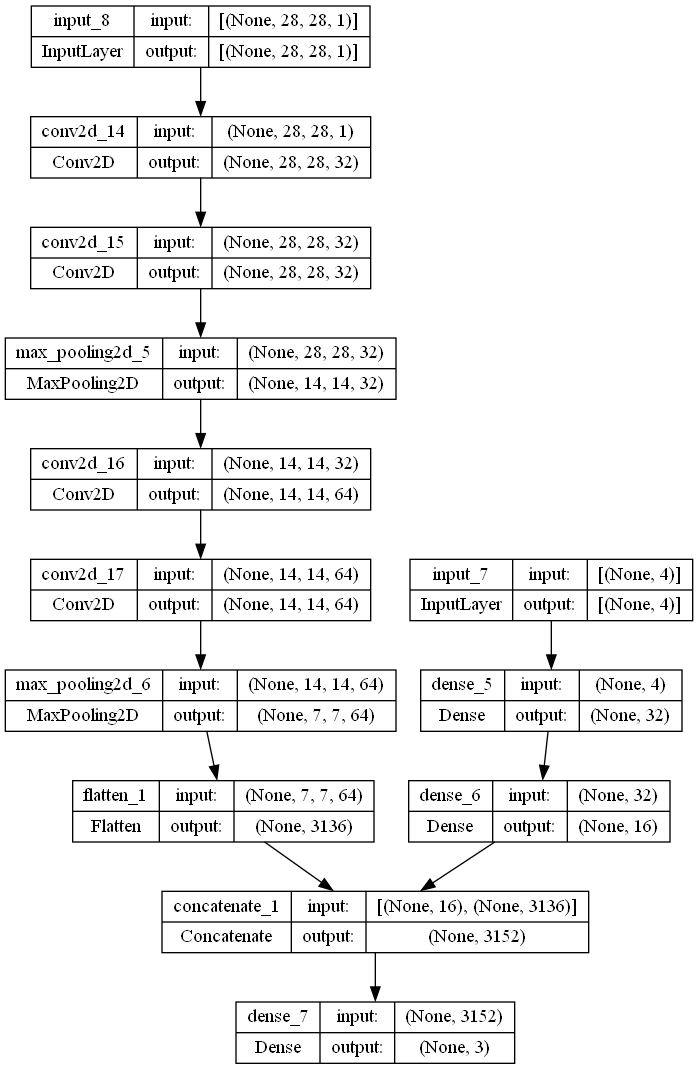

In [42]:
keras.utils.plot_model(model2, show_shapes=True)

## Subclass 방식
- 모델을 class로 구현
- \_\_init\_\_() 메소드에서 모델에 필요한 자원들(layer들)을 생성
- call() 메소드에서 모델 구조 정의

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [44]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [51]:
class MnistModel(models.Model):
    
    def __init__(self):
        super().__init__()
        self.conv_block1 = keras.Sequential([
            layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
            layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
            layers.MaxPooling2D(padding='same')
        ])
        
        self.conv_block2 = keras.Sequential([
            layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
            layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
            layers.MaxPooling2D(padding='same')
        ])
        
        self.flatten = layers.Flatten()
        self.output_layer = layers.Dense(units=10, activation='softmax')        
        
        
    def call(self, x):  
        # input data를 받아서 forward propagation을 처리. 그 추론 결과를 반환
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.flatten(x)
        output_tensor = self.output_layer(x)
        return output_tensor
        

In [52]:
# 모델생성
model = MnistModel()

# 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
# 학습
hist = model.fit(X_train, y_train, epochs=3, validation_split=0.25)

Epoch 1/3
1407/1407 [==============================] - 106s 75ms/step - loss: 0.1373 - val_loss: 0.0573
Epoch 2/3
1407/1407 [==============================] - 90s 64ms/step - loss: 0.0439 - val_loss: 0.0423
Epoch 3/3
1407/1407 [==============================] - 90s 64ms/step - loss: 0.0316 - val_loss: 0.0373


In [54]:
60000*0.75/32

1406.25